In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pylab
import time

plt.rc('font',family='Times New Roman')

import GPy
import GPyOpt

from math import *

In [77]:
%matplotlib inline 

In [78]:
def f(action, current_state):
    current_state = 10*((action)) + current_state

    return current_state

In [79]:
total_it = 500
current_state = np.random.uniform(-pi,pi,1)
state_evolution = np.zeros((total_it,1))#, dtype='int64')
# input_states = np.zeros((total_it,2))#, dtype='int64')
# output_states = np.zeros((total_it,1))#, dtype='int64')
prediction_evolution = np.zeros((total_it,1))#, dtype='int64')
k = GPy.kern.RBF(input_dim=2, variance=1., lengthscale=1.)

for i in range(total_it):

    if i%50 == 0:
        print i
    action = np.random.uniform(-pi, pi, 1)

    # state_evolution[i] = current_state
    bufferInput = np.array([action,current_state])
    bufferInput = np.reshape(bufferInput, ([1, 2]))

    if i > 0:
        input_states = np.append(input_states, bufferInput, axis = 0)
    else:
        input_states = bufferInput

    current_state = f(action, current_state)
    bufferState = np.reshape(current_state, ([1,1]))
    if i > 0:
        output_states = np.append(output_states, bufferState, axis=0)
    else:
        output_states = bufferState

    if i > 0:
        # time.sleep(0.2)
        prediction = m.predict(bufferInput)[0]
        # print prediction
        prediction_evolution[i,0] = prediction

    m = GPy.models.GPRegression(input_states, output_states, k)
    m.optimize()

    action = np.random.uniform(-pi, pi, 1)
print total_it

0
50
100
150
200
250
300
350
400
450
500


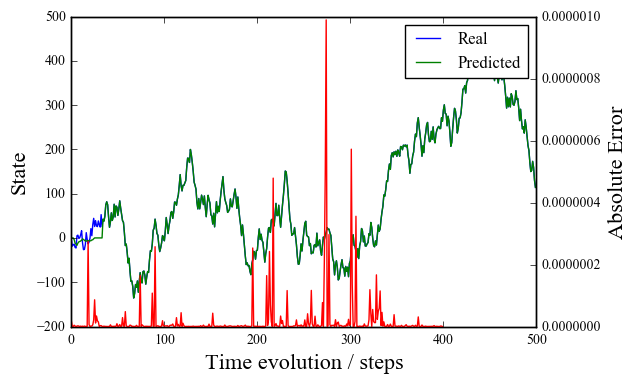

In [204]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(output_states[00:])
ax1.plot(prediction_evolution[00:])
ax2.plot(((np.abs(prediction_evolution[100:]-output_states[100:]))*(np.abs(prediction_evolution[100:]-output_states[100:]))),  'r')

ax1.legend(['Real', 'Predicted'], loc='upper right')
ax1.set_xlabel('Time evolution / steps', fontsize=16)
ax1.set_ylabel('State', fontsize=16)
ax2.set_ylabel('Absolute Error', fontsize=16)
#pylab.savefig('./stateEvolution.eps', format='eps')
plt.show()

In [390]:
#Linear Policy
def action_fromPolicy(policyParameters, bufferObservations_policy):
    actionToTake_policy = 0
    [r,c] = policyParameters.shape
    for i in range(c):
        if i < c-1:
            actionToTake_policy = actionToTake_policy + (bufferObservations_policy[0,i] * policyParameters[0,i])
        else:
            actionToTake_policy = actionToTake_policy + policyParameters[0,i]
    actionToTake_policy = np.pi * ((9/8)*np.sin(actionToTake_policy) + (1/8)*np.sin(3*actionToTake_policy))         

    return actionToTake_policy
    
def objective_function(policyParameters):
    
    goal = 100
    global m
    global totalCount
    totalReward = 0
    goal_counter = 0
    counter = 0
    
    bufferCurrentState = np.array([[0]])
    state_evolution = bufferCurrentState
    
    action = action_fromPolicy(policyParameters, bufferCurrentState)

    bufferInput_policy = np.array([action,bufferCurrentState])
    bufferInput_policy = np.reshape(bufferInput_policy, ([1, 2]))
    
    #print bufferObservations_policy, bufferInput_policy
    
    while goal_counter < 30 and counter < 300:
                
        bufferCurrentState = m.predict(bufferInput_policy)[0]
        #bufferCurrentState = f(action, bufferCurrentState)
        bufferCurrentState = np.reshape(bufferCurrentState, ([1,1]))
        state_evolution = np.append(state_evolution, bufferCurrentState, axis = 0)
        
        buffer_reward = abs(goal - bufferCurrentState[0,0])
        #print buffer_reward
        
        totalReward = totalReward + buffer_reward
        
        if buffer_reward < 10:
            goal_counter += 1
            
        action = action_fromPolicy(policyParameters, bufferCurrentState)
        bufferInput_policy = np.array([action,bufferCurrentState])
        bufferInput_policy = np.reshape(bufferInput_policy, ([1, 2]))
        
        counter += 1
    
#         bufferObservations_policy = m.predict(bufferInput_policy)[0]
#         #bufferObservations_policy = f(actionToTake_policy, bufferObservations_policy)
#         bufferObservations_policy = np.reshape(bufferObservations_policy, ([1,1]))
#         state_evolution = np.append(state_evolution, bufferObservations_policy, axis = 0)
        
#         buffer_reward = abs(goal - bufferObservations_policy[0,0])
#         #print buffer_reward
        
#         totalReward = totalReward + buffer_reward
        
#         if buffer_reward < 10:
#             goal_counter += 1
            
#         action = action_fromPolicy(policyParameters, bufferObservations_policy)
        
#         bufferInput_policy = np.array([action,bufferObservations_policy])
#         bufferInput_policy = np.reshape(bufferInput_policy, ([1, 2])) 
#         counter += 1
    
    totalCount += 1
    print goal_counter, counter, totalCount, bufferCurrentState[0,0], buffer_reward
    if buffer_reward < 5:
        plt.plot(state_evolution)
    return totalReward

In [391]:
policyBounds = np.array([1,10])
policyParameters =  np.random.uniform(low = -policyBounds, high = policyBounds)
policyParameters = np.reshape(policyParameters,([1,2]))
print policyParameters

[[-0.96151338  9.74238921]]


In [392]:
bounds = [{'domain': (-1,1), 'name': 'var_1', 'type': 'continuous', 'dimensionality':1},
         {'domain': (-10,10), 'name': 'var_4', 'type': 'continuous', 'dimensionality':1}]

3 300 1 357.656700134 257.656700134
2 300 2 670.607629776 570.607629776
0 300 3 -293.360761642 393.360761642
8 300 4 123.891387939 23.8913879395
3 300 5 346.801944733 246.801944733
13 300 6 79.6468544006 20.3531455994
3 300 7 720.282159805 620.282159805
19 300 8 132.728578568 32.7285785675
5 300 9 102.382099152 2.38209915161
0 300 10 -70.8314819336 170.831481934
11 300 11 77.9273319244 22.0726680756
30 141 12 96.2537498474 3.74625015259
0 300 13 -169.359395981 269.359395981
17 300 14 -51.6003417969 151.600341797
1 300 15 -350.197868347 450.197868347
10 300 16 704.800300598 604.800300598
0 300 17 -245.397249222 345.397249222
2 300 18 -103.14059639 203.14059639
12 300 19 -97.9422931671 197.942293167
12 300 20 111.826452255 11.8264522552
8 300 21 107.456357956 7.45635795593
0 300 22 -847.925945282 947.925945282
18 300 23 113.116451263 13.1164512634
3 300 24 271.137210846 171.137210846
30 256 25 102.026374817 2.02637481689
5 300 26 1183.57271385 1083.57271385
0 300 27 -305.086090088 405.08

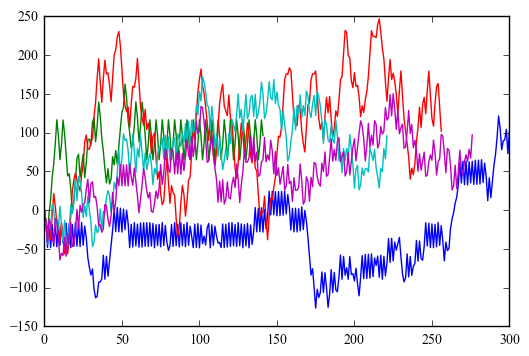

In [397]:
totalCount = 0
myBopt = GPyOpt.methods.BayesianOptimization(f = objective_function, domain = bounds, acquisition_type ='MPI', num_cores=4, verbosity=True)
max_iter = 100              # evaluation budget
myBopt.run_optimization(max_iter) 

In [401]:
policyParameters = myBopt.X[np.argmin(myBopt.Y)]
policyParameters = np.reshape(policyParameters, ([1,2]))
print policyParameters, np.argmin(myBopt.Y)

[[ 0.27100994  3.64071904]] 11


In [408]:
currentState = np.array([[0]])
bufferCurrentState = currentState
action = action_fromPolicy(policyParameters, currentState)

bufferInput_policy = np.array([action,bufferCurrentState])
bufferInput_policy = np.reshape(bufferInput_policy, ([1, 2]))
for i in range(300):
    bufferCurrentState = f(action, bufferCurrentState)
    #bufferCurrentState = m.predict(bufferInput_policy)[0]
    bufferCurrentState = np.reshape(bufferCurrentState, ([1,1]))

    currentState = np.append(currentState,bufferCurrentState, axis = 0)
    
    action = action_fromPolicy(policyParameters, bufferCurrentState)
    bufferInput_policy = np.array([action,bufferCurrentState])
    bufferInput_policy = np.reshape(bufferInput_policy, ([1, 2]))

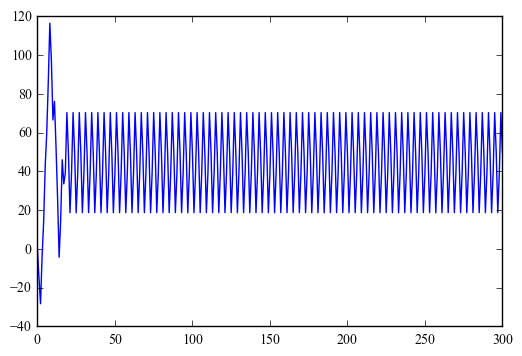

In [409]:
plt.plot(currentState)


30 141 107 96.2537498474 3.74625015259


3691.1330890655518

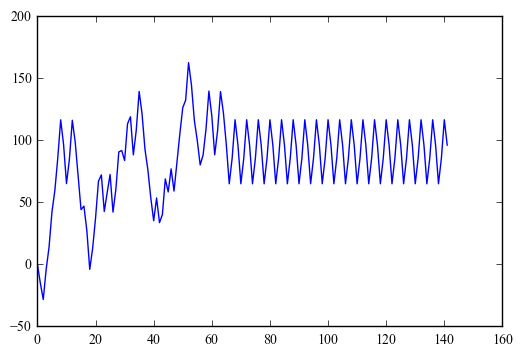

In [407]:
objective_function(policyParameters)

In [332]:
print m


Name : GP regression
Objective : -3299.67302497
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |              value  |  constraints  |  priors
  rbf.variance             |      10383419.7709  |      +ve      |        
  rbf.lengthscale          |      1363.83677883  |      +ve      |        
  Gaussian_noise.variance  |  1.83685291834e-07  |      +ve      |        
